In [1]:
import os
import sys
import asyncio
import logging

import numpy as np

from lsst.ts import salobj

import matplotlib.pyplot as plt

from lsst.ts.externalscripts.auxtel.latiss_cwfs_align import LatissCWFSAlign

In [2]:
os.environ["LSST_DDS_DOMAIN"] = 'lsatmcs'
os.environ["OSPL_URI"] = "file:///home/tribeiro/ospl.xml"

In [3]:
stream_handler = logging.StreamHandler(sys.stdout)

logger = logging.getLogger()
logger.addHandler(stream_handler)
logger.level = logging.DEBUG

In [4]:
cwfs = LatissCWFSAlign(index=1, remotes=True)

In [5]:
await cwfs.start_task

Read historical data in 0.01 sec
Read historical data in 0.41 sec
Read historical data in 0.68 sec
Read historical data in 1.57 sec
Read historical data in 1.95 sec
Read historical data in 3.26 sec
Read historical data in 4.11 sec
Read historical data in 4.99 sec
Read historical data in 5.62 sec
Read historical data in 7.17 sec
Read historical data in 10.55 sec
RemoteEvent(ATHeaderService, 0, heartbeat) falling behind; read 12 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 100 messages
RemoteEvent(ATArchiver, 0, heartbeat) falling behind; read 11 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 12 messages
RemoteTelemetry(ATDome, 0, position) falling behind; read 36 messages
Read historical data in 0.11 sec
RemoteTelemetry(ATHexapod, 0, positionStatus) falling behind; read 11 messages
RemoteEvent(ATDome, 0, doorEncoderExtremes) falling behind; read 38 messages
Remo

In [28]:
logger.level = logging.INFO

In [ ]:
# await cwfs.hexapod_offset(+2*cwfs.dz)

In [ ]:
# await cwfs.attcs.ataos.cmd_resetOffset.start()

In [6]:
cwfs.filter = "BG40"
cwfs.grating = "empty_1"

In [7]:
# cwfs.intra_visit_id = 2020031200280
# cwfs.extra_visit_id = 2020031200281
cwfs.dataPath = "/project/shared/auxTel"
# cwfs.angle = 10.
# print(cwfs.camera_rotation_angle)

In [ ]:
cwfs.exposure_time

In [8]:
await cwfs.take_intra_extra()

RemoteEvent(ATMCS, 0, target) falling behind; read 72 messages
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
intraImage expId for target: 2020031200332
extraImage expId for target: 2020031200333


In [9]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0.5, z=0.)

In [10]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
intraImage expId for target: 2020031200334
extraImage expId for target: 2020031200335


In [11]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0.5, y=-0.5, z=0.)

In [12]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
intraImage expId for target: 2020031200336
extraImage expId for target: 2020031200337


In [13]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=-0.5, y=0., z=0.)

In [26]:
cwfs.intra_visit_id = 2020031200332
cwfs.extra_visit_id = 2020031200333

In [27]:
await cwfs.run_cwfs()

Running cwfs in 2020031200332/2020031200333.


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000332.yaml
AT_O_20200312_000332: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000332: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000332.yaml
AT_O_20200312_000332: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000332: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 27 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 25 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 22 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000333.yaml
AT_O_20200312_000333: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000333: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000333.yaml
AT_O_20200312_000333: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000333: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 30 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 18 messages
Running source detection algorithm


Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139680792180480 and this is thread id 139688909678400.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3

RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 49 messages
RemoteTelemetry(ATPneumatics, 0, mainAirSourcePressure) falling behind; read 10 messages


.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139680792180480 and this is thread id 139688909678400.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139680775395072 and this is thread id 139688909678400.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingErro

RemoteTelemetry(ATHexapod, 0, positionStatus) falling behind; read 12 messages
RemoteEvent(ATAOS, 0, heartbeat) falling behind; read 11 messages
RemoteTelemetry(ATDome, 0, position) falling behind; read 55 messages
RemoteTelemetry(ATMCS, 0, trajectory) falling behind; read 12 messages
RemoteEvent(ATHeaderService, 0, heartbeat) falling behind; read 12 messages
RemoteEvent(ATArchiver, 0, heartbeat) falling behind; read 13 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 69 messages
RemoteTelemetry(ATPneumatics, 0, m2AirPressure) falling behind; read 14 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 13 messages
RemoteEvent(ATAOS, 0, detailedState) falling behind; read 13 messages
RemoteEvent(ATDome, 0, heartbeat) falling behind; read 14 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 14 messages
RemoteTelemetry(ATMCS, 0, torqueDemand) falling behind; read 14 messages
RemoteEvent(ATSpectrograph, 0, heartbeat) falling b

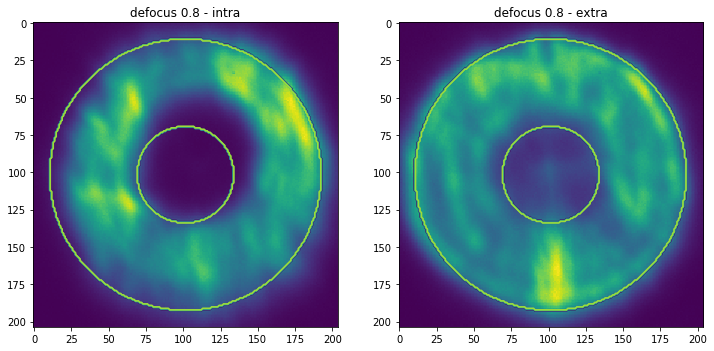

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 13 messages


In [29]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [30]:
cwfs.show_results()

Measured zernike coeficients: [3.4117603296356536, 34.965673145007514, 39.876387385092144]
De-rotated zernike coeficients: [  1.96338772 -35.07682306  39.87638739]
Hexapod offset: [-0.01498769 -0.26776201 -0.00949438]
Telescope offsets: [ -0.89926155 -16.06572048   0.        ]

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 61 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 16 messages


In [31]:
cwfs.intra_visit_id = 2020031200334
cwfs.extra_visit_id = 2020031200335

In [32]:
await cwfs.run_cwfs()

Running cwfs in 2020031200334/2020031200335.


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000334.yaml
AT_O_20200312_000334: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000334: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000334.yaml
AT_O_20200312_000334: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000334: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 16 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 25 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 21 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 25 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139681026537216 and this is thread id 139680792180480.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64

Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000335.yaml
AT_O_20200312_000335: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000335: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000335.yaml
AT_O_20200312_000335: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000335: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 30 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 13 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 26 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 22 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages
Running source detection algorithm
Remo

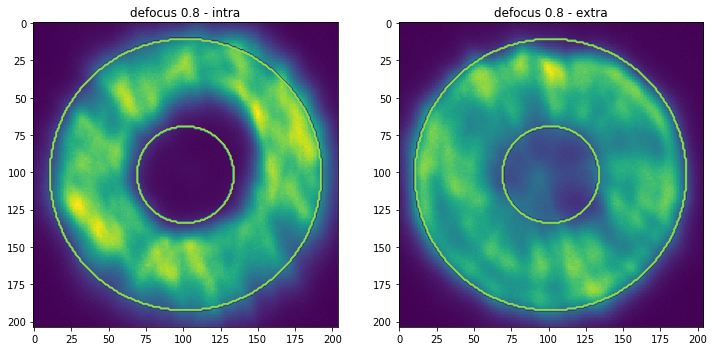

RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 12 messages


In [33]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [34]:
cwfs.show_results()

Measured zernike coeficients: [37.84469756342439, -24.990892612615472, -75.81988128537944]
De-rotated zernike coeficients: [-41.21476337  18.9237715  -75.81988129]
Hexapod offset: [0.31461651 0.14445627 0.01805235]
Telescope offsets: [18.87699085  8.66737626  0.        ]



In [36]:
cwfs.intra_visit_id = 2020031200336
cwfs.extra_visit_id = 2020031200337

In [37]:
await cwfs.run_cwfs()

Running cwfs in 2020031200336/2020031200337.


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139680792180480 and this is thread id 139681009751808.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64

Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000336.yaml
AT_O_20200312_000336: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000336: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000336.yaml
AT_O_20200312_000336: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000336: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 30 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 10 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 24 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000337.yaml
AT_O_20200312_000337: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000337: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000337.yaml
AT_O_20200312_000337: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000337: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 30 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 16 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 25 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 22 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 86 messages
Running source detection 

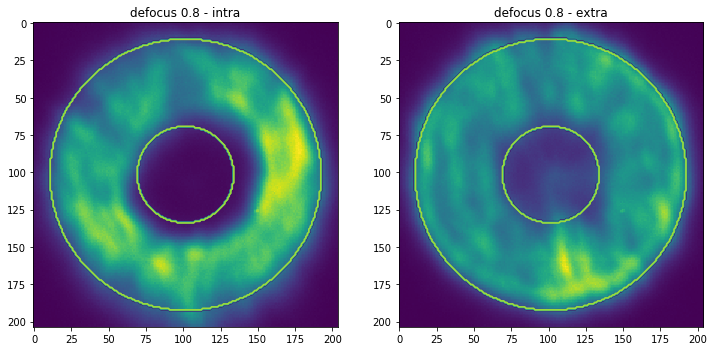

In [38]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [39]:
cwfs.show_results()

Measured zernike coeficients: [90.08232447299281, 57.44324278636074, 5.316791913909633]
De-rotated zernike coeficients: [-80.26259469 -70.5157232    5.31679191]
Hexapod offset: [ 0.61269156 -0.53828796 -0.0012659 ]
Telescope offsets: [ 36.76149375 -32.2972778    0.        ]

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 12 messages


Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139681009751808 and this is thread id 139688909678400.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139681009751808 and this is thread id 139688909678400.
Exception ignore

In [ ]:
Hexapod offset: [-0.01498769 -0.26776201 -0.00949438]
Hexapod offset: [0.31461651 0.14445627 0.01805235]
Hexapod offset: [ 0.61269156 -0.53828796 -0.0012659 ]


In [40]:
cwfs.angle

171.22330392288407

In [78]:
cwfs.sensitivity_matrix = [[1. / 131., 0., 0.],
                           [0., -1. / 131., 0.],
                           [0., 0., -1. / 4200.]]



In [41]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
intraImage expId for target: 2020031200359
extraImage expId for target: 2020031200360


In [42]:
cwfs.angle

94.29546258589602

In [73]:
cwfs.intra_visit_id = 2020031200359
cwfs.extra_visit_id = 2020031200360
cwfs.angle = 94.29546258589602

In [74]:
await cwfs.run_cwfs()

Running cwfs in 2020031200359/2020031200360.


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000359.yaml
AT_O_20200312_000359: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000359: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000359.yaml
AT_O_20200312_000359: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000359: Dark time less than exposure time. Setting dark time to the exposure time.


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000360.yaml
AT_O_20200312_000360: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000360: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000360.yaml
AT_O_20200312_000360: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000360: Dark time less than exposure time. Setting dark time to the exposure time.
Running source detection algorithm
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 43 messages
RemoteEvent(ATAOS, 0, heartbeat) falling behind; read 11 messages
RemoteEvent(ATArchiver, 0, heartbeat) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, heartbeat) falling behind; read 11 messages
RemoteEvent(ATSpectrograph, 0, heartbeat) falling behind; read 11 messages
RemoteEvent(ATPtg, 0, heartbeat) falling behind; read 12 messages


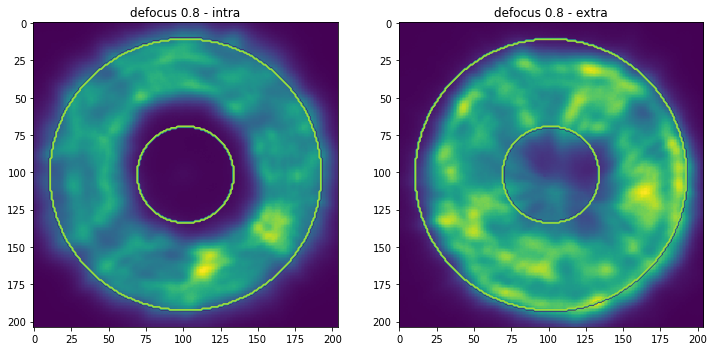

In [75]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [79]:
cwfs.show_results()

Measured zernike coeficients: [56.73010676525756, 8.189632125965955, -182.83805153268753]
De-rotated zernike coeficients: [   3.91755681  -57.18415722 -182.83805153]
Hexapod offset: [0.02990501 0.43652028 0.04353287]
Telescope offsets: [ 1.79430083 26.19121705  0.        ]



In [43]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0.5, z=0.)

In [44]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 14 messages
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 19 messages
intraImage expId for target: 2020031200361
extraImage expId for target: 2020031200362


In [45]:
cwfs.angle

94.55345673626783

In [80]:
cwfs.intra_visit_id = 2020031200361
cwfs.extra_visit_id = 2020031200362
cwfs.angle = 94.55345673626783

In [81]:
await cwfs.run_cwfs()

Running cwfs in 2020031200361/2020031200362.


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000361.yaml
AT_O_20200312_000361: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000361: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000361.yaml
AT_O_20200312_000361: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000361: Dark time less than exposure time. Setting dark time to the exposure time.


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139680775395072 and this is thread id 139680792180480.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64

Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000362.yaml
AT_O_20200312_000362: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000362: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000362.yaml
AT_O_20200312_000362: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000362: Dark time less than exposure time. Setting dark time to the exposure time.
Running source detection algorithm
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 53 messages
RemoteEvent(ATPtg, 0, heartbeat) falling behind; read 11 messages
Running CWFS code.
Measured zernike coeficients: [124.71311827603878, -22.518979644650848, -203.58845212289884]
De-rotated zernike coeficients: [ -32.34877531 -122.53172263 -203.58845212]
Hexapod offset: [-0.24693722  0.93535666  0.04847344]
Telescope offsets: [-14.81623297  56.12139968  

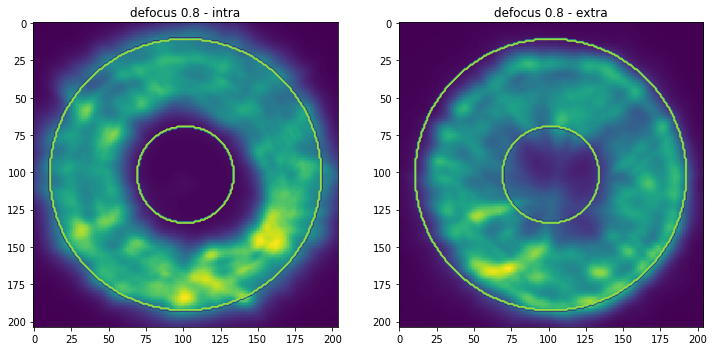

In [82]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [83]:
cwfs.show_results()

Measured zernike coeficients: [124.71311827603878, -22.518979644650848, -203.58845212289884]
De-rotated zernike coeficients: [ -32.34877531 -122.53172263 -203.58845212]
Hexapod offset: [-0.24693722  0.93535666  0.04847344]
Telescope offsets: [-14.81623297  56.12139968   0.        ]



In [ ]:
Measured zernike coeficients: [56.73010676525756, 8.189632125965955, -182.83805153268753]
Measured zernike coeficients: [124.71311827603878, -22.518979644650848, -203.58845212289884]


In [46]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=-0.5, z=0.)

In [47]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 13 messages
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
intraImage expId for target: 2020031200363
extraImage expId for target: 2020031200364


In [48]:
cwfs.angle

94.78393081417468

In [84]:
cwfs.intra_visit_id = 2020031200363
cwfs.extra_visit_id = 2020031200364
cwfs.angle = 94.78393081417468

In [85]:
await cwfs.run_cwfs()

Running cwfs in 2020031200363/2020031200364.


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000363.yaml
AT_O_20200312_000363: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000363: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000363.yaml
AT_O_20200312_000363: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000363: Dark time less than exposure time. Setting dark time to the exposure time.


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139680792180480 and this is thread id 139681009751808.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64

Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000364.yaml
AT_O_20200312_000364: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000364: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000364.yaml
AT_O_20200312_000364: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000364: Dark time less than exposure time. Setting dark time to the exposure time.
Running source detection algorithm
RemoteEvent(ATMCS, 0, heartbeat) falling behind; read 11 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 56 messages
RemoteEvent(ATPtg, 0, heartbeat) falling behind; read 11 messages
Running CWFS code.
Measured zernike coeficients: [53.20468192736806, 0.10889426038000716, -242.04429369018686]
De-rotated zernike coeficients: [  -4.3286685   -53.02841376 -242.04429369]
Hexapod offset: [-0.03304327  0.4047

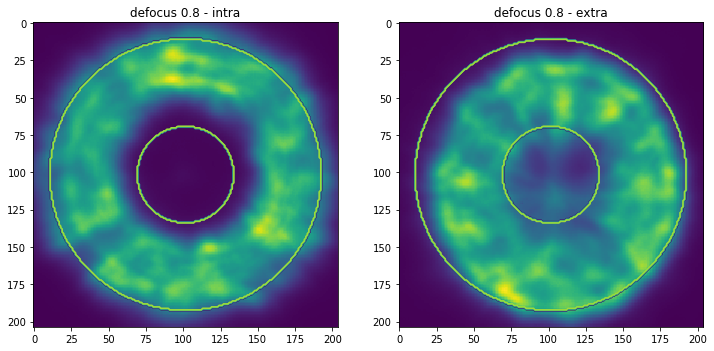

In [86]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [49]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=-0.5, z=0.)

In [50]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
intraImage expId for target: 2020031200365
extraImage expId for target: 2020031200366


In [51]:
cwfs.angle

95.00421417197606

In [94]:
cwfs.intra_visit_id = 2020031200365
cwfs.extra_visit_id = 2020031200366
cwfs.angle = 95.00421417197606


In [95]:
await cwfs.run_cwfs()

Running cwfs in 2020031200365/2020031200366.


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139680775395072 and this is thread id 139681009751808.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64

Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000365.yaml
AT_O_20200312_000365: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000365: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000365.yaml
AT_O_20200312_000365: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000365: Dark time less than exposure time. Setting dark time to the exposure time.


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000366.yaml
AT_O_20200312_000366: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000366: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000366.yaml
AT_O_20200312_000366: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000366: Dark time less than exposure time. Setting dark time to the exposure time.
Running source detection algorithm
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 42 messages
RemoteEvent(ATHexapod, 0, heartbeat) falling behind; read 10 messages
RemoteEvent(ATPneumatics, 0, heartbeat) falling behind; read 11 messages
RemoteEvent(ATAOS, 0, heartbeat) falling behind; read 11 messages
RemoteEvent(ATDome, 0, heartbeat) falling behind; read 11 messages
RemoteEvent(ATPtg, 0, heartbeat) falling behind; read 12 messages
Running CWFS 

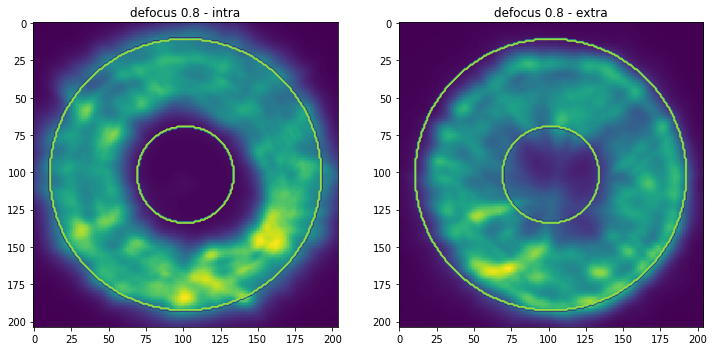

In [89]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [52]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0., y=0.5, z=0.)

In [53]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 11 messages
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
intraImage expId for target: 2020031200367
extraImage expId for target: 2020031200368


In [54]:
cwfs.angle

95.19698512172705

In [96]:
cwfs.intra_visit_id = 2020031200367
cwfs.extra_visit_id = 2020031200368
cwfs.angle = 95.19698512172705

In [98]:
await cwfs.run_cwfs()

Running cwfs in 2020031200367/2020031200368.


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139681009751808 and this is thread id 139680792180480.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64

Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000367.yaml
AT_O_20200312_000367: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000367: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000367.yaml
AT_O_20200312_000367: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000367: Dark time less than exposure time. Setting dark time to the exposure time.


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000368.yaml
AT_O_20200312_000368: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000368: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000368.yaml
AT_O_20200312_000368: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000368: Dark time less than exposure time. Setting dark time to the exposure time.
Running source detection algorithm
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 42 messages
RemoteEvent(ATPtg, 0, heartbeat) falling behind; read 11 messages
Running CWFS code.
Measured zernike coeficients: [63.63531388244971, 1.7177890049827167, -232.19198776848006]
De-rotated zernike coeficients: [  -4.05337054  -63.52931732 -232.19198777]
Hexapod offset: [-0.03094176  0.48495662  0.05528381]
Telescope offsets: [-1.85650559 29.09739725  0.  

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
cwfs.show_results()

In [55]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0.5, y=0., z=0.)

In [56]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 15 messages
intraImage expId for target: 2020031200369
extraImage expId for target: 2020031200370


In [57]:
cwfs.angle

95.36627323544002

In [90]:
cwfs.intra_visit_id = 2020031200361
cwfs.extra_visit_id = 2020031200362
cwfs.angle = 95.36627323544002

In [91]:
await cwfs.run_cwfs()

Running cwfs in 2020031200361/2020031200362.


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139681009751808 and this is thread id 139680775395072.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64

Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000361.yaml
AT_O_20200312_000361: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000361: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000361.yaml
AT_O_20200312_000361: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000361: Dark time less than exposure time. Setting dark time to the exposure time.


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000362.yaml
AT_O_20200312_000362: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000362: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000362.yaml
AT_O_20200312_000362: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000362: Dark time less than exposure time. Setting dark time to the exposure time.
Running source detection algorithm
RemoteEvent(ATHeaderService, 0, heartbeat) falling behind; read 10 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 57 messages
RemoteEvent(ATPtg, 0, heartbeat) falling behind; read 11 messages
Running CWFS code.
Measured zernike coeficients: [124.71311827603878, -22.518979644650848, -203.58845212289884]
De-rotated zernike coeficients: [ -34.08373667 -122.06049815 -203.58845212]
Hexapod offset: [-0.26018

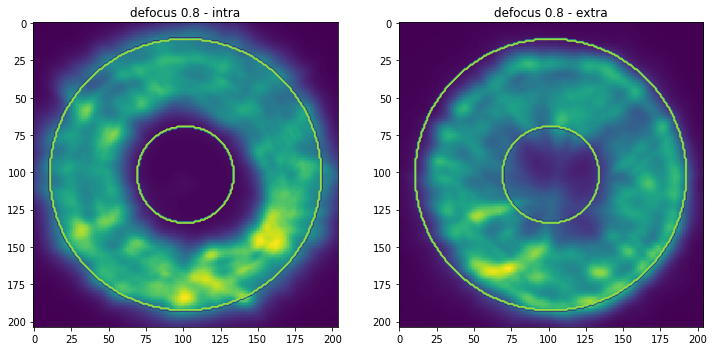

In [92]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [93]:
cwfs.show_results()

Measured zernike coeficients: [124.71311827603878, -22.518979644650848, -203.58845212289884]
De-rotated zernike coeficients: [ -34.08373667 -122.06049815 -203.58845212]
Hexapod offset: [-0.2601812   0.93175953  0.04847344]
Telescope offsets: [-15.61087176  55.90557167   0.        ]



In [58]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=-1.0, y=0., z=0.)

In [59]:
await cwfs.take_intra_extra()

ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
intraImage expId for target: 2020031200371
extraImage expId for target: 2020031200372


In [60]:
cwfs.angle

95.52812957158865

In [61]:
await cwfs.attcs.ataos.cmd_offset.set_start(x=0.5, y=0., z=0.)

In [62]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None

In [63]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 13 messages
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
intraImage expId for target: 2020031200373
extraImage expId for target: 2020031200374


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


RemoteEvent(ATMCS, 0, target) falling behind; read 10 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000373.yaml
AT_O_20200312_000373: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000373: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000373.yaml
AT_O_20200312_000373: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000373: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 14 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 27 messages
RemoteEvent(ATMCS, 0, target) falling b

/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000374.yaml
AT_O_20200312_000374: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000374: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000374.yaml
AT_O_20200312_000374: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000374: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 10 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 24 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 21 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages
Running source detection algorithm
Remo

In [65]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None

Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139680775395072 and this is thread id 139688909678400.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139680775395072 and this is thread id 139688909678400.
Exception ignore

In [66]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
intraImage expId for target: 2020031200375
extraImage expId for target: 2020031200376


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000375.yaml
AT_O_20200312_000375: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000375: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000375.yaml
AT_O_20200312_000375: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000375: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 30 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 24 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 23 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 31 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


RemoteEvent(ATMCS, 0, target) falling behind; read 11 messages
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000376.yaml
AT_O_20200312_000376: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000376: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000376.yaml
AT_O_20200312_000376: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000376: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 28 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 21 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 31 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 26 messages
Running source detection algorithm
RemoteEvent(ATDomeT

In [67]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': -0.09199987,
          'y':  -0.13539846,
          'z':   0.05523413,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

In [68]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None

In [69]:
await cwfs.run_cwfs()

Intra/Extra images not taken. Running take image sequence.
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 14 messages
ENGTEST 0001 - 0001
Waiting for header service LFO before continuing


Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139680783787776 and this is thread id 139688909678400.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139680783787776 and this is thread id 139688909678400.


intraImage expId for target: 2020031200377
extraImage expId for target: 2020031200378


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000377.yaml
AT_O_20200312_000377: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000377: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000377.yaml
AT_O_20200312_000377: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000377: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATMCS, 0, target) falling behind; read 29 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 30 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 32 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 24 messages


/home/tribeiro/WORK/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:295: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000378.yaml
AT_O_20200312_000378: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000378: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000378.yaml
AT_O_20200312_000378: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000378: Dark time less than exposure time. Setting dark time to the exposure time.
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 29 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 30 messages
RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 16 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 28 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 10 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 10 messages
RemoteTelemetry(ATPtg, 0, curr

Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139681026537216 and this is thread id 139688909678400.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139681026537216 and this is thread id 139688909678400.
Exception ignore

Measured zernike coeficients: [-25.5506087071581, -36.38275538832452, 22.56868629672046]
De-rotated zernike coeficients: [-33.42831647  29.3101715   22.5686863 ]
Hexapod offset: [ 0.25517799  0.22374177 -0.0053735 ]
Telescope offsets: [15.3106793  13.42450603  0.        ]



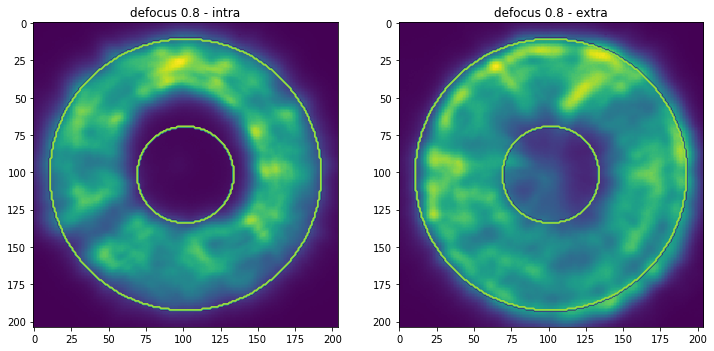

RemoteEvent(ATDomeTrajectory, 0, logMessage) falling behind; read 11 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 12 messages


In [70]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
cwfs.show_results()

In [ ]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.0,
          'z': -0.01062974/2.,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

In [ ]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None

In [ ]:
await cwfs.run_cwfs()

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': -0.37688719,
          'y': 0.0,
          'z': 0.0,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

In [ ]:
cwfs.intra_visit_id = None
cwfs.extra_visit_id = None

In [ ]:
await cwfs.run_cwfs()

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
cwfs.show_results()

[-0.37688719 -0.03842189 -0.00876713]

In [ ]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.40382696/2.,
          'z': 0.0,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

In [ ]:
await cwfs.latiss.take_object(exptime=1,n=1)

In [ ]:
cwfs.intra_visit_id = 2020022000254
cwfs.extra_visit_id = 2020022000255
cwfs.angle = 0.

In [ ]:
await cwfs.run_cwfs()

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
cwfs.show_results()

In [ ]:
offset = {'m1': 0.0,
          'm2': 0.0,
          'x': 0.0,
          'y': 0.40382696/2.,
          'z': 0.0,
          'u': 0.0,
          'v': 0.0
          }

await cwfs.attcs.ataos.cmd_offset.set_start(**offset)

In [ ]:
cwfs.cwfs_selected_sources

In [ ]:
bbox = cwfs.source_selection_result.sources[6].getFootprint().getBBox()

In [ ]:
bbox

In [ ]:
img_mean = np.mean(cwfs.detection_exp[bbox].image.array)
img_min = np.min(cwfs.detection_exp[bbox].image.array)
img_max = np.max(cwfs.detection_exp[bbox].image.array)
img_std = np.std(cwfs.detection_exp[bbox].image.array)
print(img_max)
image = np.array(cwfs.detection_exp[bbox].image.array, copy=True)
# image[image > img_mean+5*img_std] = img_min
image[image == img_max] = img_min
plt.imshow(image, origin='lower')

In [ ]:
cwfs = LatissCWFSAlign(index=1)

In [ ]:
await cwfs.start_task

In [ ]:
cwfs.filter = "empty_1"
cwfs.grating = "empty_1"

In [ ]:
await cwfs.run_cwfs()

In [ ]:
fig1 = plt.figure(1, figsize=(12,8))

ax11 = fig1.add_subplot(121)

ax11.set_title("defocus 0.8 - intra")
ax11.imshow(cwfs.I1[0].image0)
ax11.contour(cwfs.algo.pMask) 

ax12 = fig1.add_subplot(122)

ax12.set_title("defocus 0.8 - extra")
ax12.imshow(cwfs.I2[0].image0)
ax12.contour(cwfs.algo.pMask) 

In [ ]:
await cwfs.attcs.ataos.cmd_enableCorrection.set_start(hexapod=True, m1=False)

In [ ]:
await cwfs.attcs.atpneumatics.cmd_openM1Cover.start()

In [ ]:
await cwfs.attcs.ataos.cmd_resetOffset.start()

In [ ]:
await cwfs.attcs.ataos.cmd_applyAxisOffset.set_start(axis="z", offset=-0.18)

In [ ]:
44.58+29

In [71]:
await cwfs.attcs.shutdown()

Disabling ATAOS corrections
Disable ATDomeTrajectory
Slew telescope to Park position.
Sending command
Stop tracking.
Mount tracking state is 9
Tracking state: 10.
Tracking state: 8.
In Position: True.
In Position: False.
Scheduling check coroutines
process as completed...
Got False
Telescope not in position
atmcs: <State.ENABLED: 2>
atptg: <State.ENABLED: 2>
ataos: <State.ENABLED: 2>
atpneumatics: <State.ENABLED: 2>
athexapod: <State.ENABLED: 2>
[Telescope] delta Alt = +020.054 | delta Az= -048.117
[Telescope] delta Alt = +019.729 | delta Az= -046.345
[Telescope] delta Alt = +018.322 | delta Az= -042.360
[Telescope] delta Alt = +015.665 | delta Az= -038.361
[Telescope] delta Alt = +012.054 | delta Az= -034.361
[Telescope] delta Alt = +008.094 | delta Az= -030.362
[Telescope] delta Alt = +004.475 | delta Az= -026.370
[Telescope] delta Alt = +001.789 | delta Az= -022.421
[Telescope] delta Alt = +000.356 | delta Az= -018.577
[Telescope] delta Alt = +000.003 | delta Az= -014.911
[Telescope

In [72]:
await cwfs.latiss.standby()

[atcamera]::[<State.ENABLED: 2>, <State.DISABLED: 1>, <State.STANDBY: 5>]
[atspectrograph]::[<State.ENABLED: 2>, <State.DISABLED: 1>, <State.STANDBY: 5>]
[atheaderservice]::[<State.ENABLED: 2>, <State.DISABLED: 1>, <State.STANDBY: 5>]
[atarchiver]::[<State.ENABLED: 2>, <State.DISABLED: 1>, <State.STANDBY: 5>]
All components in standby.


In [111]:
angles = [94.29546258589602, 94.55345673626783, 94.78393081417468, 95.00421417197606, 95.19698512172705]

In [112]:
zern = [[56.73010676525756, 8.189632125965955, -182.83805153268753],
[124.71311827603878, -22.518979644650848, -203.58845212289884],
[53.20468192736806, 0.10889426038000716, -242.04429369018686],
[-28.441399439485657, -2.2013288336828327, -185.3117742900592], 
[63.63531388244971, 1.7177890049827167, -232.19198776848006]]

In [124]:
zern_derot = []
for i in range(len(zern)):
    print(i, zern[i], angles[i])
    zern_derot.append(np.matmul(zern[i], cwfs.rotation_matrix(angles[i])))

0 [56.73010676525756, 8.189632125965955, -182.83805153268753] 94.29546258589602
1 [124.71311827603878, -22.518979644650848, -203.58845212289884] 94.55345673626783
2 [53.20468192736806, 0.10889426038000716, -242.04429369018686] 94.78393081417468
3 [-28.441399439485657, -2.2013288336828327, -185.3117742900592] 95.00421417197606
4 [63.63531388244971, 1.7177890049827167, -232.19198776848006] 95.19698512172705


In [126]:
hex_offset = []
for i in range(len(zern)):
    hex_offset.append(np.matmul(zern_derot[i], cwfs.sensitivity_matrix))

In [125]:
for i in range(1, len(zern)):
    print(zern_derot[i] - zern_derot[0])

[-36.26633212 -65.34756541 -20.75040059]
[ -8.24622531   4.15574346 -59.20624216]
[-3.62957958 85.70916589 -2.47372276]
[ -7.97092735  -6.3451601  -49.35393624]


In [123]:
for i in range(1, len(zern)):
    print(zern_derot[i] - zern_derot[0])

[ 24.96272977  70.14989504 -20.75040059]
[  7.8700009   -2.94710375 -59.20624216]
[ 17.08955242 -84.0983235   -2.47372276]
[  4.94087374   7.26076775 -49.35393624]


In [127]:
for i in range(1, len(hex_offset)):
    print(hex_offset[i] - hex_offset[0])

[-0.27684223  0.49883638  0.00494057]
[-0.06294828 -0.03172323  0.01409672]
[-2.77067144e-02 -6.54268442e-01  5.88981609e-04]
[-0.06084677  0.04843634  0.01175094]


Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139680792180480 and this is thread id 139688909678400.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f0bbc283dd0>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139680792180480 and this is thread id 139688909678400.
Exception ignore

In [102]:
zern[1][0] - zern[0][0]

67.98301151078122

In [103]:
zern[2][0] - zern[0][0]

-3.525424837889503

In [104]:
zern[3][0] - zern[0][0]

-85.17150620474322

In [105]:
zern[4][0] - zern[0][0]

6.905207117192148

In [129]:
np.matmul(np.array([40,40,40]), cwfs.sensitivity_matrix)

array([ 0.30534351, -0.30534351, -0.00952381])

RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 10 messages
RemoteEvent(ATHeaderService, 0, logMessage) falling behind; read 12 messages
RemoteEvent(ATMCS, 0, target) falling behind; read 21 messages
RemoteTelemetry(ATPtg, 0, timeAndDate) falling behind; read 19 messages
RemoteTelemetry(ATPtg, 0, guidingAndOffsets) falling behind; read 19 messages
RemoteTelemetry(ATPtg, 0, currentTargetStatus) falling behind; read 19 messages
RemoteTelemetry(ATPtg, 0, mountStatus) falling behind; read 19 messages


In [ ]:
print()